<a href="https://colab.research.google.com/github/jrctechmind/data-science-portfolio/blob/main/Desafio_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Análise Exploratória dos Dados ---
Digite a porcentagem do arquivo que deseja carregar (0-100, deixe em branco para carregar 100%): 

Por favor, selecione o arquivo CSV:


Saving data.csv to data.csv

Visualização das primeiras linhas:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Descrição estatística dos dados:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9

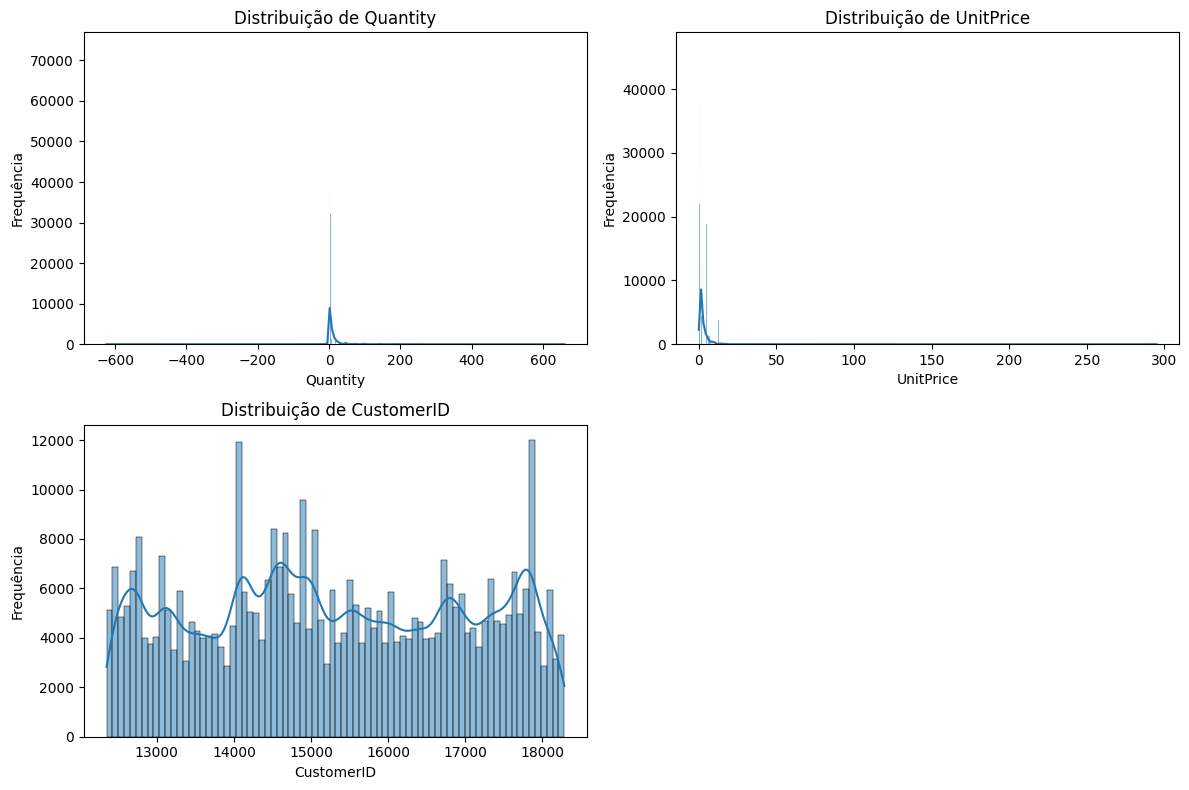


--- Seleção de um Algoritmo de Clusterização ---
Escolha o algoritmo de clusterização (KMeans, DBSCAN, Mean Shift): Kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



--- Análise dos Clusters Obtidos ---
Padrões e características em comum entre os clusters:
         Quantity  UnitPrice  CustomerID
Cluster                                 
0       -0.032913   0.049628   -0.808772
1        7.856226  -0.338341    0.014196
2       -0.114320  -0.049928    0.919903


<ipython-input-1-82b69b3d1f35>:98: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Cluster').mean())


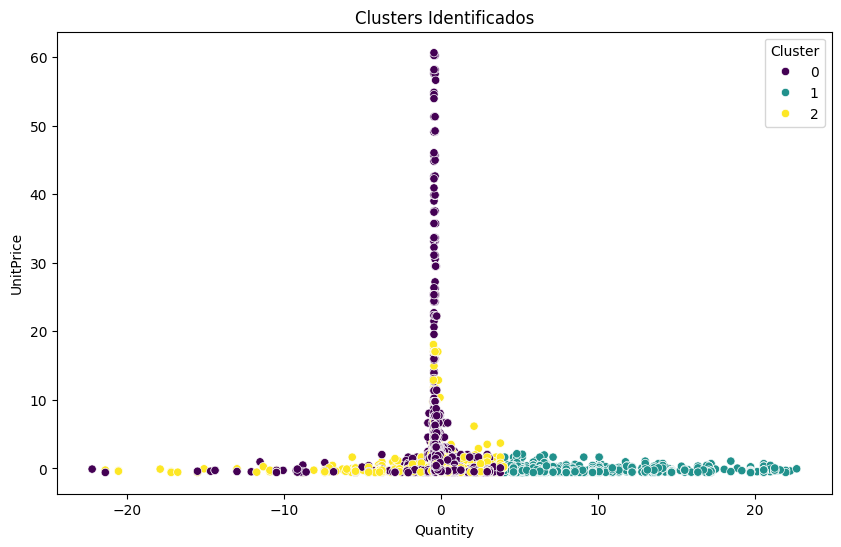


--- Interpretação dos resultados obtidos ---

Perfil de compras dos clientes de cada cluster:
         Quantity  UnitPrice  CustomerID
Cluster                                 
0       -0.032913   0.049628   -0.808772
1        7.856226  -0.338341    0.014196
2       -0.114320  -0.049928    0.919903

Justificativa:
A segmentação de clientes por meio dos clusters identificados permite à empresa compreender melhor o comportamento de compra de diferentes grupos de clientes. Isso pode ser útil para personalizar campanhas de marketing e estratégias de vendas, adaptando-as às preferências e necessidades específicas de cada segmento de clientes.

Sugestões de ações:
- Criar campanhas promocionais direcionadas para cada cluster, oferecendo descontos em produtos populares dentro de cada grupo.
- Personalizar e segmentar o conteúdo de e-mails e anúncios online com base nos padrões de compra de cada segmento de clientes.
- Desenvolver novos produtos ou serviços com base nas preferências e necessid

<ipython-input-1-82b69b3d1f35>:112: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Cluster').mean())


In [ ]:
import pandas as pd
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.preprocessing import StandardScaler

def upload_file():
    uploaded_file = files.upload()
    for filename in uploaded_file.keys():
        return uploaded_file[filename]

def count_total_lines(file_content):
    count = 0
    for _ in file_content:
        count += 1
    return count

print("\n--- Análise Exploratória dos Dados ---")

percentage = input("Digite a porcentagem do arquivo que deseja carregar (0-100, deixe em branco para carregar 100%): ")
if percentage.strip() == "":
    percentage = 100
else:
    try:
        percentage = float(percentage)
        if not 0 <= percentage <= 100:
            raise ValueError
    except ValueError:
        print("Porcentagem inválida. Carregando 100% do arquivo.")
        percentage = 100

print("\nPor favor, selecione o arquivo CSV:")
csv_content = upload_file()

if percentage < 100:
    file_content = io.StringIO(csv_content.decode("utf-8"))
    total_lines = count_total_lines(file_content)
    num_lines_to_skip = int(total_lines * (1 - percentage / 100))
    df = pd.read_csv(io.BytesIO(csv_content), skiprows=lambda x: x % num_lines_to_skip != 0)
else:
    df = pd.read_csv(io.BytesIO(csv_content), encoding='latin1')

print("\nVisualização das primeiras linhas:")
print(df.head())

print("\nDescrição estatística dos dados:")
print(df.describe())

print("\nVerificar a presença de dados nulos:")
print(df.isnull().sum())

print("\nVerificar a presença de dados duplicados:")
print(df.duplicated().sum())

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    df = df[(df[column] - df[column].mean()).abs() <= 3 * df[column].std()]

plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.dropna(inplace=True)

print("\n--- Seleção de um Algoritmo de Clusterização ---")

algorithm = input("Escolha o algoritmo de clusterização (KMeans, DBSCAN, Mean Shift): ")

if algorithm.lower() == 'kmeans':
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(df[numeric_columns])
    df['Cluster'] = kmeans.fit_predict(df[numeric_columns])

elif algorithm.lower() == 'dbscan':
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    df['Cluster'] = dbscan.fit_predict(df[numeric_columns])

elif algorithm.lower() == 'mean shift':
    mean_shift = MeanShift()
    df['Cluster'] = mean_shift.fit_predict(df[numeric_columns])

else:
    print("Algoritmo selecionado não reconhecido. Por favor, escolha entre KMeans, DBSCAN ou Mean Shift.")

if 'Cluster' in df.columns:
    print("\n--- Análise dos Clusters Obtidos ---")
    print("Padrões e características em comum entre os clusters:")
    print(df.groupby('Cluster').mean())

    if len(numeric_columns) >= 2:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=numeric_columns[0], y=numeric_columns[1], hue='Cluster', palette='viridis')
        plt.title('Clusters Identificados')
        plt.xlabel(numeric_columns[0])
        plt.ylabel(numeric_columns[1])
        plt.legend(title='Cluster')
        plt.show()

print("\n--- Interpretação dos resultados obtidos ---")

print("\nPerfil de compras dos clientes de cada cluster:")
print(df.groupby('Cluster').mean())

print("\nJustificativa:")
print("A segmentação de clientes por meio dos clusters identificados permite à empresa compreender melhor o comportamento de compra de diferentes grupos de clientes. Isso pode ser útil para personalizar campanhas de marketing e estratégias de vendas, adaptando-as às preferências e necessidades específicas de cada segmento de clientes.")

print("\nSugestões de ações:")
print("- Criar campanhas promocionais direcionadas para cada cluster, oferecendo descontos em produtos populares dentro de cada grupo.")
print("- Personalizar e segmentar o conteúdo de e-mails e anúncios online com base nos padrões de compra de cada segmento de clientes.")
print("- Desenvolver novos produtos ou serviços com base nas preferências e necessidades identificadas em cada cluster.")